In [1]:
import matplotlib.pyplot as plt
from dataset_preprocessing import TokenInfo
import numpy as np
import seaborn as sns
import pickle

c:\Users\Andri Freyr\miniconda3\envs\cs229\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Clustering Distribution Analysis

In [2]:
def run_cluster_distribution_analysis(cluster_distribution_path, cluster_freq_distribution_path):
    with open(cluster_distribution_path, 'rb') as f:
        cluster_distributions = pickle.load(f)
    
    with open(cluster_freq_distribution_path, 'rb') as f:
        cluster_freq_distributions = pickle.load(f)

    for layer in range(24):
        print(f'Layer: {layer}\n')
        cluster_dist = cluster_distributions[layer]
        cluster_freq_dist = cluster_freq_distributions[layer]

        sum_dist = sum(x[1] for x in cluster_dist)
        dist_fractions = [round(x[1]/sum_dist, 4) for x in cluster_dist]
        sum_freq = sum(cluster_freq_dist)
        freq_fractions = [round(x/sum_freq, 4) for x in cluster_freq_dist]
        print(f'Cluster Distributions:\n{cluster_dist}\n')
        print(f'Cluster Fractions Distributions:\n{dist_fractions}\n')

        print(f'Cluster Frequency Distributions:\n{cluster_freq_dist}\n')
        print(f'Cluster Frequency Fractions Distributions:\n{freq_fractions}\n\n')

### Clustering with PCA using 5% most frequent tokens

In [3]:
"""
run_cluster_distribution_analysis(
    'cluster_pkl/clustering_most_freq_cluster_distributions.pkl',
    'cluster_pkl/clustering_most_freq_cluster_freq_distributions.pkl')
"""

"\nrun_cluster_distribution_analysis(\n    'cluster_pkl/clustering_most_freq_cluster_distributions.pkl',\n    'cluster_pkl/clustering_most_freq_cluster_freq_distributions.pkl')\n"

### Unweighted clustering with random tokens

In [5]:
"""
run_cluster_distribution_analysis(
    'cluster_pkl/clustering_unweighted_cluster_distributions.pkl',
    'cluster_pkl/clustering_unweighted_cluster_freq_distributions.pkl')
"""

"\nrun_cluster_distribution_analysis(\n    'cluster_pkl/clustering_unweighted_cluster_distributions.pkl',\n    'cluster_pkl/clustering_unweighted_cluster_freq_distributions.pkl')\n"

### Weighted clustering with random tokens

In [6]:
"""
run_cluster_distribution_analysis(
    'cluster_pkl/clustering_weighted_cluster_distributions.pkl',
    'cluster_pkl/clustering_weighted_cluster_freq_distributions.pkl')
"""

"\nrun_cluster_distribution_analysis(\n    'cluster_pkl/clustering_weighted_cluster_distributions.pkl',\n    'cluster_pkl/clustering_weighted_cluster_freq_distributions.pkl')\n"

### Cluster composition analysis

In [7]:
with open('cluster_pkl/clustering_weighted_preds_decoded.pkl', 'rb') as f:
    preds = pickle.load(f)

In [21]:
for layer in preds.keys():
    print(f"\nLayer: {layer} - Example tokens routed to clusters\n")
    for cluster in preds[layer].keys():
        tokens = np.array([x[1] for x in preds[layer][cluster]])
        # If there are more than 100 tokens, take a random sample of 100
        if len(tokens) > 100:
            sample_indices = np.random.choice(range(len(tokens)), 100, replace=False)
            sample_tokens = tokens[sample_indices]
        else:
            sample_tokens = tokens
        print(f'Cluster: {cluster}, \n{sample_tokens}\n')



Layer: 0 - Example tokens routed to clusters

Cluster: 0, 
[' Beatles' 'Ultimately' ' skeptical' ' feet' ' narrowed' ' thirst'
 ' equal' ' units' ' descript' 'ricting' ' farm' ' Completed'
 ' marginalized' 'reshold' ' remain' 'actually' ' Certainly'
 ' contraception' ' resource' ' happens' ' found' ' taking' ' achieved'
 'fifth' ' had' ' apartheid' ' experts' ' articles' ' invading' ' marvel'
 ' divisive' 'busters' ' probabilities' ' them' ' handle' ' i' ' instance'
 ' whole' 'Throughout' ' contradiction' ' frustrations' ' expensive'
 ' Alien' ' hospital' ' chords' ' detract' ' residential' ' added'
 ' starvation' 'either' ' hypotheses' ' some' ' picture' ' impractical'
 ' myself' ' encode' 'episode' ' want' ' vaguely' ' fee' ' explode' ' jan'
 ' unwilling' ' embody' 'nings' ' astronomical' ' preset' 'to' ' hardship'
 'them' '7' 'ipples' ' subconscious' ' language' ' courageous'
 ' attention' ' Needless' ' monitoring' ' $' ' prayed' ' relationships'
 ' Gentle' ' naive' ' Elvis' 'resis

### Token Frequency Analysis

In [2]:
token_info = TokenInfo()

...Loading dataset...
...Loading complete...


In [3]:
token_freqs = np.array(sorted(list(token_info.token_counts.values())))

In [4]:
cnt_tokens = np.sum(token_freqs)

In [5]:
cnt_tokens

99498262

In [12]:
token_freqs.shape[0] * 0.01

499.79

In [13]:
np.sum(token_freqs[-500:])/cnt_tokens

0.5443295079867827

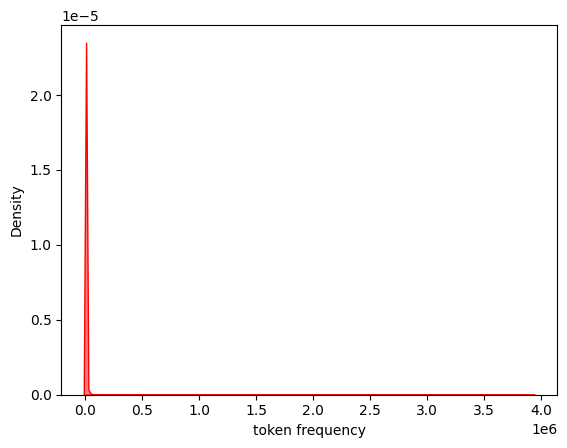

In [6]:
sns.kdeplot(token_freqs, fill=True, color='r', alpha=0.5)
plt.xlabel('token frequency')
plt.show()

In [7]:
for i in np.linspace(90, 100, 11):
    print(f'{i} percentile, {np.percentile(token_freqs, i)}')


90.0 percentile, 2312.0
91.0 percentile, 2586.0
92.0 percentile, 2917.760000000002
93.0 percentile, 3327.0
94.0 percentile, 3954.3199999999997
95.0 percentile, 4712.599999999991
96.0 percentile, 5789.159999999982
97.0 percentile, 7659.979999999989
98.0 percentile, 10983.200000000012
99.0 percentile, 19679.40000000008
100.0 percentile, 3932482.0


In [8]:
for i, t in enumerate(token_info.top_n(50)):
    print(f'{i}, {t}')

0, (13, '.', 3932482)
1, (11, ',', 3259473)
2, (262, ' the', 3155352)
3, (290, ' and', 2155455)
4, (286, ' of', 1956767)
5, (284, ' to', 1825320)
6, (198, '\n', 1706000)
7, (257, ' a', 1478621)
8, (287, ' in', 1271252)
9, (12, '-', 926863)
10, (318, ' is', 840309)
11, (329, ' for', 776238)
12, (492, '..', 613565)
13, (351, ' with', 592647)
14, (447, '�', 561724)
15, (326, ' that', 550820)
16, (319, ' on', 495997)
17, (25, ':', 493786)
18, (357, ' (', 405048)
19, (247, '�', 393665)
20, (389, ' are', 386448)
21, (383, ' The', 381717)
22, (345, ' you', 363524)
23, (355, ' as', 362606)
24, (314, ' I', 344230)
25, (307, ' be', 340175)
26, (82, 's', 336810)
27, (340, ' it', 323477)
28, (416, ' by', 310280)
29, (422, ' from', 304457)
30, (379, ' at', 282352)
31, (8, ')', 278764)
32, (281, ' an', 273679)
33, (373, ' was', 269707)
34, (423, ' have', 267411)
35, (393, ' or', 264426)
36, (428, ' this', 257714)
37, (534, ' your', 240872)
38, (481, ' will', 232736)
39, (460, ' can', 229507)
40, (46